In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [56]:
def compute_beta_measures(G):

    # COMPUTE LAMBDAS (OUT-DEGREE)
    lambdas = dict(G.out_degree())

    # COMPUTE BETA-MEASURES
    beta_measures = {}
    for target_node in list(G.nodes()):
        beta = 0
        predecessors = list(G.predecessors(target_node))

        for node in predecessors:
            beta += G.get_edge_data(node, target_node)["weight"] / lambdas[node]

        beta_measures[target_node] = beta

    return beta_measures

# Analysis of cumulative network dynamics

In [57]:
# SET YEAR RANGE
first_year = 2010; last_year = 2019
years = [str(y) for y in range(first_year, last_year+1)]

# INITIALIZE DICTIONARY OF DATAFRAME FOR SURFERS
results_dict = {}

# LOOP OVER YEARS
for year in years:

    # LOAD NETWORK FOR YEAR
    year_net = nx.read_gml(f"../data/time_series_networks/overall_snapshot_{year}.gml")

    # GET IN-DEGREE AND BETA
    in_degrees = dict(year_net.in_degree(weight="weight"))
    betas = compute_beta_measures(year_net)
    deg_per_event = {}

    for surfer in in_degrees.keys():
        try:
            deg_per_event[surfer] = in_degrees[surfer] / year_net.nodes[surfer]["events"]
        except:
            deg_per_event[surfer] = 0

    # LOOP OVER NODES IN NETWORK
    for surfer in list(year_net.nodes()):

        # UPDATE DATAFRAME IF SURFER ALREADY BEING TRACKED
        if surfer in results_dict.keys():
            results_dict[surfer].loc[year] = [in_degrees[surfer], betas[surfer], deg_per_event[surfer]]

        # INITIALIZE DATAFRAME IF SURFER NOT BEING TRACKED
        else:
            results_dict[surfer] = pd.DataFrame(columns=["in-degree", "beta", "deg_per_event"])
            results_dict[surfer].loc[year] = [in_degrees[surfer], betas[surfer], deg_per_event[surfer]]

for key, df in results_dict.items():
    results_dict[key] = df.reset_index(names="year")

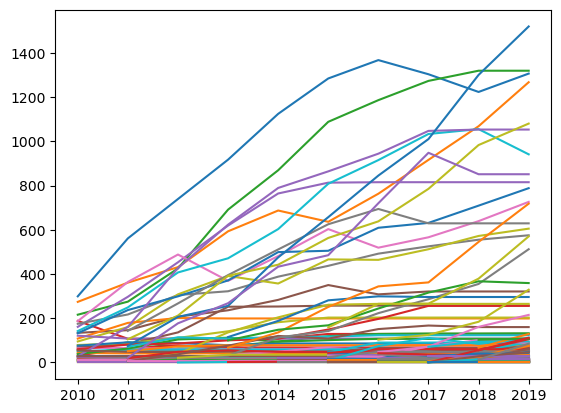

In [58]:
for surfer, df in results_dict.items():

    plt.plot(df["year"], df["in-degree"])

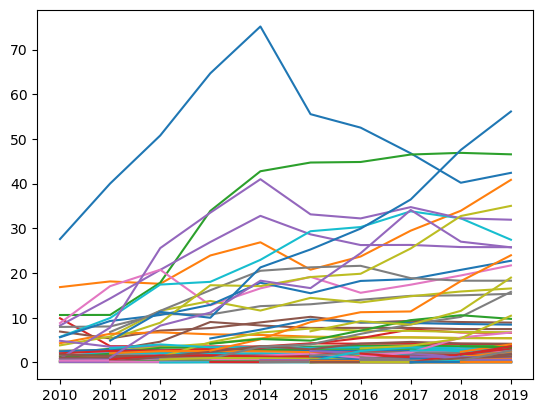

In [59]:
for surfer, df in results_dict.items():

    plt.plot(df["year"], df["beta"])

### Try filtering out surfers who were already on the tour in 2010 (new)

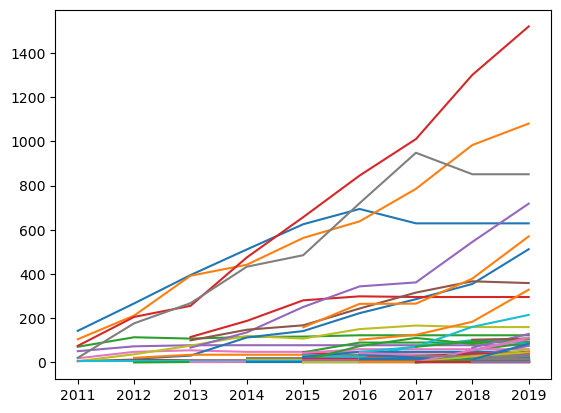

In [60]:
for surfer, df in results_dict.items():

    if "2010" in df["year"].values:
        continue

    plt.plot(df["year"], df["in-degree"])

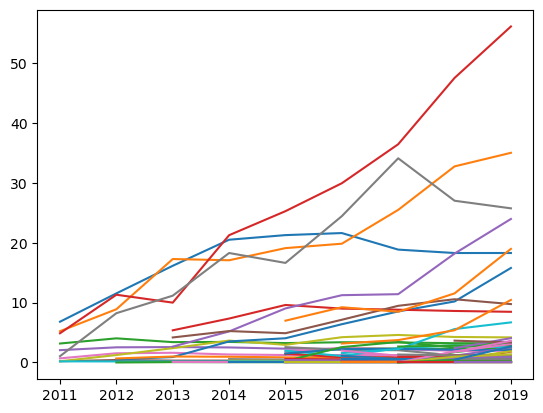

In [61]:
for surfer, df in results_dict.items():

    if "2010" in df["year"].values:
        continue

    plt.plot(df["year"], df["beta"])

# Analysis of performance in individual seasons

In [62]:
# SET YEAR RANGE
first_year = 2010; last_year = 2019
years = [str(y) for y in range(first_year, last_year+1)]

# INITIALIZE DICTIONARY OF DATAFRAME FOR SURFERS
seasons_dict = {}

# LOOP OVER YEARS
for year in years:

    # LOAD NETWORK FOR YEAR
    year_net = nx.read_gml(f"../data/season_networks/{year}_season.gml")

    # GET IN-DEGREE AND BETA
    in_degrees = dict(year_net.in_degree(weight="weight"))
    betas = compute_beta_measures(year_net)
    deg_per_event = {}

    for surfer in in_degrees.keys():
        try:
            deg_per_event[surfer] = in_degrees[surfer] / year_net.nodes[surfer]["events"]
        except:
            deg_per_event[surfer] = 0

    # LOOP OVER NODES IN NETWORK
    for surfer in list(year_net.nodes()):

        # UPDATE DATAFRAME IF SURFER ALREADY BEING TRACKED
        if surfer in seasons_dict.keys():
            seasons_dict[surfer].loc[year] = [in_degrees[surfer], betas[surfer], deg_per_event[surfer]]

        # INITIALIZE DATAFRAME IF SURFER NOT BEING TRACKED
        else:
            seasons_dict[surfer] = pd.DataFrame(columns=["in-degree", "beta", "deg_per_event"])
            seasons_dict[surfer].loc[year] = [in_degrees[surfer], betas[surfer], deg_per_event[surfer]]

for key, df in seasons_dict.items():
    seasons_dict[key] = df.reset_index(names="year")

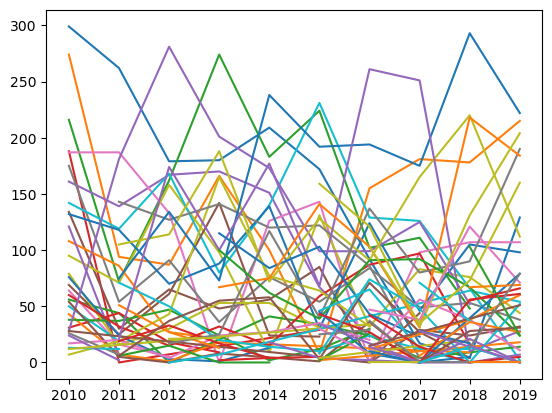

In [74]:
for surfer, df in seasons_dict.items():

    # if "2010" in df["year"].values:
    #     continue

    # if len(df) < 5:
    #     continue

    plt.plot(df["year"], df["in-degree"])

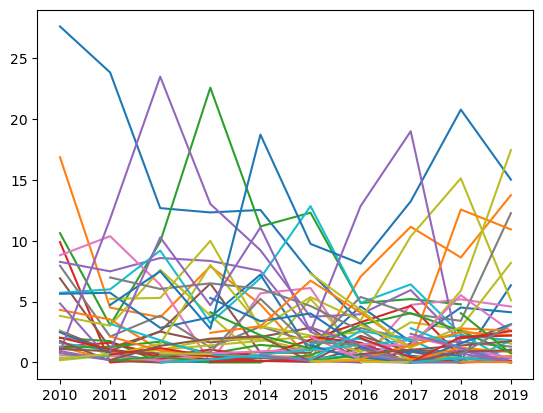

In [66]:
for surfer, df in seasons_dict.items():

    plt.plot(df["year"], df["beta"])

## Analyze careers of new surfers

In [83]:
# CREATE DICT FOR NEW SURFERS (NOT ON CT IN 2010)
new_surfers = {}

for surfer, df in seasons_dict.items():

    if "2010" in df["year"].values:
        continue

    new_surfers[surfer] = seasons_dict[surfer]

In [86]:
print(len(new_surfers))

84


### Compare different lengths of career

In [87]:
long_cars = {}
short_cars = {}

cutoff = 2

for surfer, df in new_surfers.items():

    if len(df) <= cutoff:
        short_cars[surfer] = df
    else:
        long_cars[surfer] = df

In [88]:
print(len(short_cars))
print(len(long_cars))

51
33


In [98]:
# GET DISTRIBUTIONS OF FIRST SEASON RESULTS FOR EACH GROUP
short_first_degrees = []
short_first_betas = []
long_first_degrees = []
long_first_betas = []

for surfer, df in short_cars.items():
    short_first_degrees.append(df.iloc[0]["in-degree"])
    short_first_betas.append(df.iloc[0]["beta"])

for surfer, df in long_cars.items():
    long_first_degrees.append(df.iloc[0]["in-degree"])
    long_first_betas.append(df.iloc[0]["beta"])

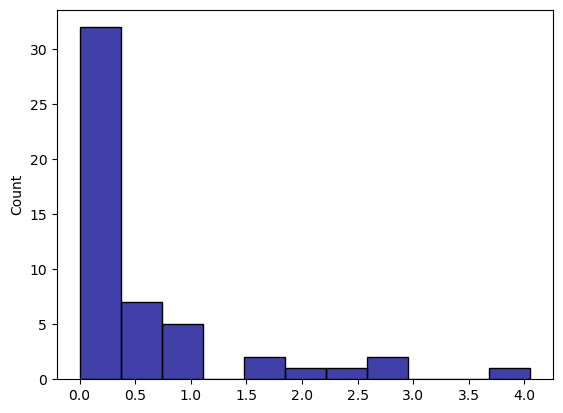

<Figure size 640x480 with 0 Axes>

In [101]:
    # SHOW SEASONS HISTOGRAM
    sns.histplot(short_first_betas, color="darkblue")
    # plt.title("Distribution of Season Count", fontsize=18)
    # plt.xlabel("Number of Seasons", fontsize=14)
    # plt.ylabel("Surfer count", fontsize=14)
    plt.show(); plt.clf()

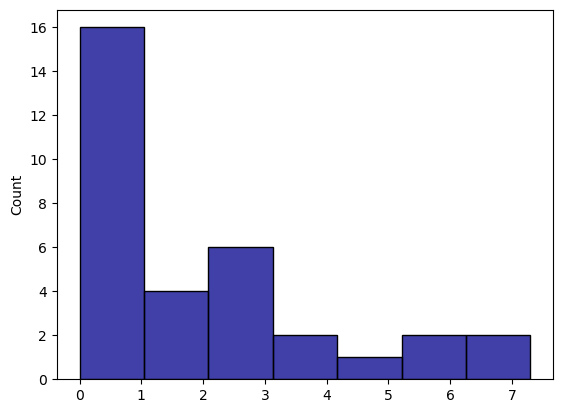

<Figure size 640x480 with 0 Axes>

In [102]:
    # SHOW SEASONS HISTOGRAM
    sns.histplot(long_first_betas, color="darkblue")
    # plt.title("Distribution of Season Count", fontsize=18)
    # plt.xlabel("Number of Seasons", fontsize=14)
    # plt.ylabel("Surfer count", fontsize=14)
    plt.show(); plt.clf()